In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
mainpath = "E:/Curso de Python/Repositorio/python-ml-course/datasets/"
filepath = "auto/auto-mpg.csv"
#data = pd.read_csv(os.path.join(mainpath,filepath))

In [3]:
X = np.random.uniform(1,100,100)
mu = 0
sd = 30
n = 100
err = np.random.normal(mu,sd,n)
Y = X**2 + 3*X + 124 + err


In [4]:
data = pd.DataFrame({"Y":Y,"X":X})

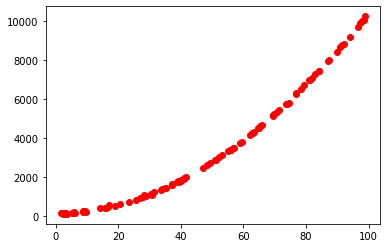

In [5]:
%matplotlib inline
plt.plot(data["X"],data["Y"],"ro")

In [6]:
data.head()

,Y,X
0,1079.942268,28.131023
1,155.735841,5.566881
2,108.638804,2.766079
3,137.205513,2.580192
4,7423.879139,84.103014


In [7]:
data.corr()

,Y,X
Y,1.000000,0.966708
X,0.966708,1.000000


In [8]:
#feature_cols = ["cylinders","displacement","horsepower","weight"]

In [9]:
#data=data.dropna()

In [10]:
X = data["X"]
Y = data["Y"]
X = X[:,np.newaxis]

In [11]:
len(X),len(Y)

(100, 100)

In [12]:
for i in range(1,10):
    poly = PolynomialFeatures (degree = i)
    X_data = poly.fit_transform(X)
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print ("Regresión de grado ",i)
    print("R2: ",lm.score(X_data,Y))

Regresión de grado  1
R2:  0.9345236784750428
Regresión de grado  2
R2:  0.9999063678413618
Regresión de grado  3
R2:  0.999906510624155
Regresión de grado  4
R2:  0.9999076021431925
Regresión de grado  5
R2:  0.9999110233806262
Regresión de grado  6
R2:  0.9999122671778031
Regresión de grado  7
R2:  0.9999124290461225
Regresión de grado  8
R2:  0.9999152363843729
Regresión de grado  9
R2:  0.9999081054592016


In [13]:
i=2
poly = PolynomialFeatures (degree = i)
X_data = poly.fit_transform(X)
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)
print ("Regresión de grado ",i)
print("R2: ",lm.score(X_data,Y))

Regresión de grado  2
R2:  0.9999063678413618


In [14]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

In [15]:
regresion_validation(X_data, Y, lm.predict(X_data))

SSD: 84580.83700826953, RSE: 29.22929846870122, Y_mean: 3437.8405536958253, error: 0.8502226328466129%


In [16]:
lm.intercept_

119.94814644521966

In [17]:
lm.coef_

array([0.        , 3.27383001, 0.99722967])

## Usando Statsmodels

In [18]:
import statsmodels.api as sm

In [19]:
i=2
poly = PolynomialFeatures (degree = i)
X_data = poly.fit_transform(X)
model = sm.OLS(Y,X_data).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.179e+05
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          4.11e-196
Time:                        13:25:16   Log-Likelihood:                -478.91
No. Observations:                 100   AIC:                             963.8
Df Residuals:                      97   BIC:                             971.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        119.9481      8.163     14.694      0.000     103.747     136.149
x1             3.2738      0.386      8.484      0.000       2.508       4.040
x2             0.9972      0.004    260.258      0.000       0.990       1.005
==============================================================================
Omnibus:                        5.643   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.101
Skew:                           0.535   Prob(JB):                       0.0780
Kurtosis:                       3.279   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
regresion_validation(X_data,Y,model.predict(X_data))

SSD: 84580.83700826924, RSE: 29.22929846870117, Y_mean: 3437.8405536958253, error: 0.8502226328466114%


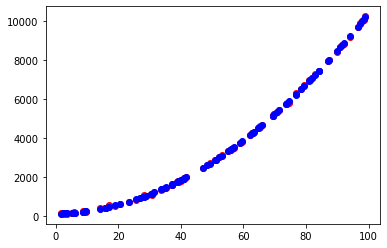

In [22]:
%matplotlib inline
plt.plot(data["X"],data["Y"],"ro")
plt.plot(data["X"],model.predict(X_data),"bo")